## Breast Cancer Survival

![Breast Cancer Survival](https://github.com/RadhikaM200/Machine-Learning-and-EDA/blob/main/Breast%20Cancer%20Survival/Breast%20Cancer.png?raw=true)

## Table of Contents

1. [Problem Statement](#section1)<br>
  - 1.1 [Background Information](#section101)<br>
  - 1.2 [Plan of Action](#section102)<br>
  - 1.2 [End Result](#section103)<br><br>
2. [Study Questions](#section2)<br>
3. [Business Process](#section3)<br>
4. [Loading Data and Packages](#section4)<br>
  - 4.1 [Importing Packages](#section401)<br>
  - 4.2 [Loading Data](#section402)<br>
  - 4.3 [Data Description](#section403)<br><br>
5. [Data Preprocessing](#section5)<br><br>
6. [Exploratory Data Analysis](#section6)<br>
  - 6.1 [**Of all the patients, how many survived?**](#section601)<br>
  - 6.2 [**Lets check the relation between Age and Status**](#section602)<br>
  - 6.3 [**Lets check the relation between Pos_axillary_nodes and Status**](#section603)<br>
  - 6.4 [**Lets check the relation between Years_of_operation and Status**](#section604)<br>
  - 6.5 [**Lets check the relation between Age, Pos_axillary_nodes and Status**](#section605)<br>
  - 6.6 [**Let us check the correlation between all the variables using a heatmap**](#section606)<br><br>

7. [End Results](#section7)<br>
  - 7.1 [Hypothesis](#section701)<br>

<a id=section1></a>
## 1. Problem Statement


<a id=section101></a>
## 1.1 Background Information

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


<a id=section102></a>
## 1.2 Plan of Action

We'll perform **Diagnostic Analysis** on the given dataset in order to find patterns and relationships between Data and it's various attributes. This is an old dataset and a lot of advancements have taken place in terms of treatment plans and medications to treat patients with much better results. So, this can be used to find what factors played very important roles in determining a patient's health post their operations.

<a id=section103></a>
## 1.3 End Result


We'll get the factors which contributed towards the survival status of patients post their cancer operation in the period 1958-1970.

<a id=section2></a>
## 2. Study Questions 

**1. How different factors individually affect the Patient's survival after operation?**<br>
**2. How various factors together affect the Patient's survival after operation?**

<a id=section3> </a>
## 3. Business Process

1. The available data is already structured. We'll do Diagnostic Analysis to find patterns among data.
2. Finally, we'll draw conclusions from our analysis

<a id=section4> </a>
## 4. Loading Data and Packages

<a id=section401></a>
## 4.1 Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split

# To supress all the warnings
import warnings
warnings.filterwarnings("ignore")

<a id=section402></a>
## 4.2 Loading Data

In [2]:
breast_cancer = pd.read_csv('https://raw.githubusercontent.com/insaid2018/R/master/Projects/Breast_cancer_survival.csv')
# cancer_df = breast_cancer.copy(deep=True)
breast_cancer.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<a id=section403></a>
## 4.3 Data Description


The dataset has **306 rows** and **4 columns**


|Column Name  |  Description|
|--|--|
| Age | Age of patient at time of operation (numerical) |
| Years_of_operation|  Patient's year of operation (year - 1900, numerical)|
| Pos_axillary_nodes| Number of positive axillary nodes detected (numerical) |
| Status|  Survival status (class attribute) :  1 -> the patient survived 5 years or longer; 2-> the patient died within 5 years
|

In [3]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 306 non-null    int64
 1   Years_of_operation  306 non-null    int64
 2   Pos_axillary_nodes  306 non-null    int64
 3   Status              306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
breast_cancer.isna().sum()

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
dtype: int64

- We can see there are **306 records** and **4 attributes**, out of which one is a target variable.
  - The 3 attributes are:
     - **Age**
     - **Years_of_operation**
     - **Pos_axillary_nodes**
  - And, the target variable is:
     - **Status**
- There seem to be **no NULL values**
- The datatypes seem normal too

In [5]:
breast_cancer.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


- Pos_axillary_nodes is **Positively Skewed** as Mean (=4.026) > Median (=1) and 52 seems like an outlier value which is affecting the mean.

<a id=section5> </a>
## 5. Data Preprocessing

- **Analysing outliers on Pos_axillary_nodes column**

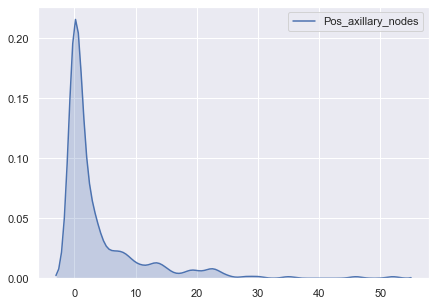

In [6]:
sns.set(rc=({'figure.figsize' : (7,5)}))
sns.kdeplot(breast_cancer['Pos_axillary_nodes'], shade=True)

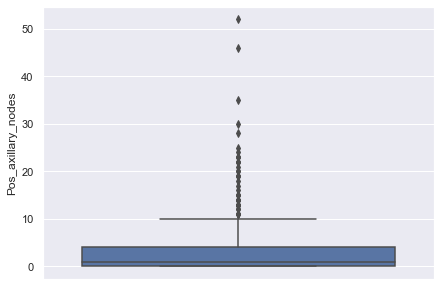

In [7]:
sns.boxplot(y=breast_cancer['Pos_axillary_nodes'])

In [8]:
q1 = breast_cancer['Pos_axillary_nodes'].quantile(0.25)
q3 = breast_cancer['Pos_axillary_nodes'].quantile(0.75)
iqr = q3-q1
# outliers = []
outliers = breast_cancer.query('~((@q1-1.5*@iqr) <= Pos_axillary_nodes <=(@q3+1.5*@iqr))')
print("The outlier values are : \n{}".format(outliers.sample(10)))
print("The percentage of outlier values : {0:5.2f}%". format(len(outliers)*100/len(breast_cancer)))

The outlier values are : 
     Age  Years_of_operation  Pos_axillary_nodes  Status
185   55                  66                  18       1
238   62                  59                  13       2
198   57                  62                  14       2
9     34                  58                  30       1
188   55                  69                  22       1
136   51                  59                  13       2
22    37                  60                  15       1
227   60                  61                  25       1
261   65                  66                  15       2
168   54                  65                  23       2
The percentage of outlier values : 13.07%


**Observations:**
- **13.07%** is a big number to deal with. Removing or handling them by any other means will lead to **loss of information**. So, we'll not remove them all.

- In order to treat the skewness a bit and make the distribution a little better, we can **remove the values from 24 onwards**, as very few points are spread over a large range. The outliers below 24 are close to each other and it looks like removing them would lead to a loss of genuine information.

In [9]:
print("The percentage of values which will be dropped : {0:2.2f}%".format(len(breast_cancer[breast_cancer['Pos_axillary_nodes']>= 24])*100 / len(breast_cancer)))

The percentage of values which will be dropped : 2.29%


In [10]:
breast_cancer = breast_cancer[breast_cancer['Pos_axillary_nodes'] < 24]
breast_cancer.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


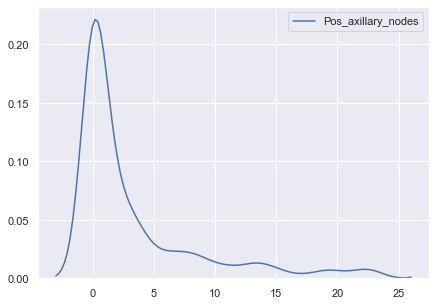

In [11]:
sns.kdeplot(breast_cancer['Pos_axillary_nodes'])

- **The distribution looks a bit better**

<a id=section6> </a>
## 6. Exploratory Data Analysis

In [12]:
breast_cancer.head(2)

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1


<a id=section601></a>
## 6.1 Of all the Patients, how many survived?

In [13]:
labels = ["Survived 5 years or longer", "Passed away within 5 years"]

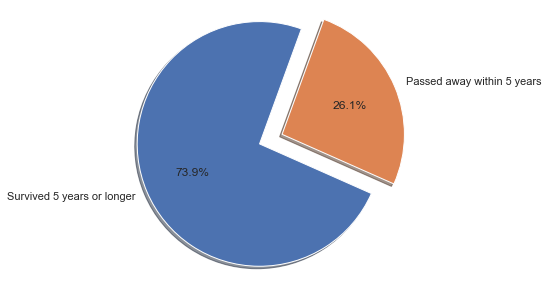

<Figure size 2160x2160 with 0 Axes>

In [14]:
fig1, ax1 = plt.subplots()

plt.figure(figsize=(30,30))

ax1.pie(breast_cancer.groupby(['Status'])['Status'].count(), explode = (0.1, 0.1), labels = labels, autopct='%1.1f%%',
       shadow=True, startangle=70)

ax1.axis('equal')  
# plt.tight_layout()
plt.show()

In [15]:
breast_cancer.groupby(['Status'])['Status'].count()

Status
1    221
2     78
Name: Status, dtype: int64

- We can see that **73.5% (=225)** patients survived 5 years or more post the operation, whereas **26.5% (=81)** patients passed away within 5 years.



<br><br>

**PS : It is worthy of noting that we are dealing with an imbalanced dataset here.**

<a id=section602></a>
## 6.2 Lets check the relation between Age and Status

Text(0.5, 1, 'Fig 1: Age vs Status')

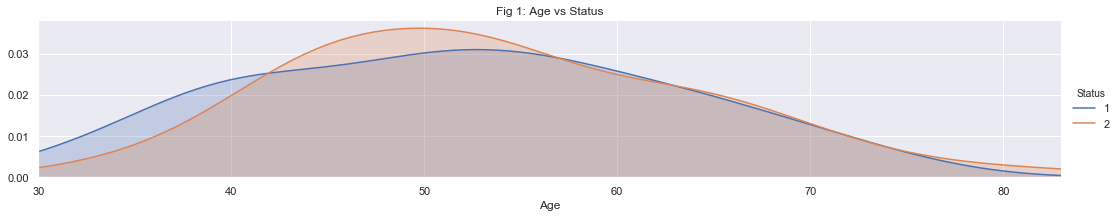

In [16]:
rel_fig = sns.FacetGrid(breast_cancer, hue="Status", aspect=5)
rel_fig.map(sns.kdeplot, 'Age', shade=True)

rel_fig.set(xlim=(breast_cancer.Age.min(),breast_cancer.Age.max()))

rel_fig.add_legend()

plt.title('Fig 1: Age vs Status')

**Creating Age Bins/Groups for an elaborate understanding**

- We can divide the age into groups for better analysis.
      - Group 1: ages 30-43
      - Group 2: ages 44-57
      - Group 3: ages 58-71
      - Group 4: ages 72 and above

In [17]:
ageG = pd.DataFrame()
ageG['AgeGroups'] = breast_cancer.apply(lambda x: 'Group1' if x['Age'] >= 30 and x['Age'] <= 43 else 
                                                 ('Group2' if x['Age'] >= 44 and x['Age'] <= 57 else
                                                 ('Group3' if x['Age'] >= 58 and x['Age'] <= 71 else 'Group4')), axis=1)

In [18]:
breast_cancer = pd.concat([breast_cancer, ageG], axis=1, names = ['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status', 'AgeGroups'])
breast_cancer.sample(5)

,Age,Years_of_operation,Pos_axillary_nodes,Status,AgeGroups
261,65,66,15,2,Group3
161,53,65,12,2,Group2
176,54,69,7,1,Group2
225,60,61,1,1,Group3
143,52,59,2,2,Group2


- **Finding out the survival rate per group**
<br>**Using Crosstab function**

In [19]:
print(" Fig 2: CrossTab Function Between AgeGroups and Status")
pd.crosstab([ageG['AgeGroups']],breast_cancer['Status'], margins=True).apply(lambda x: 100*x/len(breast_cancer)).style.background_gradient(cmap='autumn_r')

 Fig 2: CrossTab Function Between AgeGroups and Status


Status,1,2,All
AgeGroups,,,
Group1,19.732441,4.013378,23.745819
Group2,30.434783,14.046823,44.481605
Group3,20.735786,6.688963,27.424749
Group4,3.010033,1.337793,4.347826
All,73.913043,26.086957,100.000000


**Analysing the above two figures**
   - All the Groups have more patients surviving for **more than 5 years after Operation** than them **surviving for lesser time**.

<a id=section603></a>
## 6.3 Lets check the relation between Pos_axillary_nodes and Status

Text(0.5, 1, 'Fig 3: Pos_axillary_nodes vs Status')

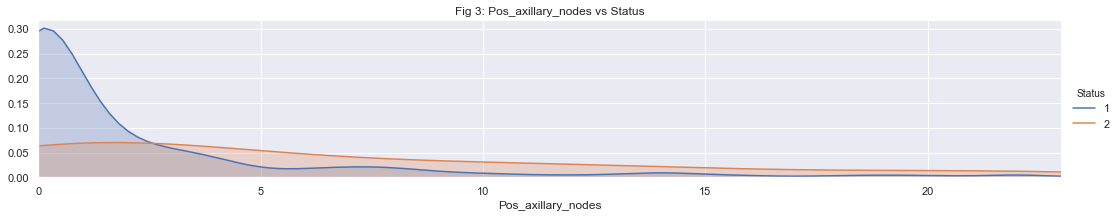

In [20]:
rel_fig = sns.FacetGrid(breast_cancer,hue="Status", aspect = 5)
rel_fig.map(sns.kdeplot, 'Pos_axillary_nodes' ,shade=True)

rel_fig.set(xlim=(breast_cancer.Pos_axillary_nodes.min(), breast_cancer.Pos_axillary_nodes.max()))

rel_fig.add_legend()

plt.title("Fig 3: Pos_axillary_nodes vs Status")

**We can see that the data is spread between values: 0-23.** <br>
   - The values for **Status=1** (Patients surviving for more than 5 years after operation) is concentrated more between values **0-5**
   - Most of the values for **Status=2** (Patients surviving for less than 5 years after operation) is spread across a broader range of **0-10** and fewer datapoints are spread from **15-23**.


- **Dividing Values into bins of size 10 for better analysis**

In [21]:
posG = pd.DataFrame()
posG['PosGroups'] = breast_cancer.apply(lambda x: 'Group1' if x['Pos_axillary_nodes'] >= 0 and x['Pos_axillary_nodes'] <= 5 else 
                                                 ('Group2' if x['Pos_axillary_nodes'] >= 6 and x['Pos_axillary_nodes'] <= 11 else
                                                 ('Group3' if x['Pos_axillary_nodes'] >= 12 and x['Pos_axillary_nodes'] <= 17 else 'Group4' )), axis=1)

In [22]:
breast_cancer = pd.concat([breast_cancer, posG], axis=1, names = ['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status', 'posG'])
breast_cancer.sample(3)

,Age,Years_of_operation,Pos_axillary_nodes,Status,AgeGroups,PosGroups
225,60,61,1,1,Group3,Group1
6,33,60,0,1,Group1,Group1
27,38,60,0,1,Group1,Group1


In [23]:
breast_cancer.columns

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status',
       'AgeGroups', 'PosGroups'],
      dtype='object')

In [24]:
print(" Fig 4.a: CrossTab Function Between PosGroups and Status")
pd.crosstab(posG['PosGroups'], breast_cancer.Status, margins=True).apply(lambda x: 100*x/ len(breast_cancer)).style.background_gradient(cmap='summer_r')

 Fig 4.a: CrossTab Function Between PosGroups and Status


Status,1,2,All
PosGroups,,,
Group1,63.545151,15.384615,78.929766
Group2,6.354515,5.016722,11.371237
Group3,2.341137,3.010033,5.351171
Group4,1.672241,2.675585,4.347826
All,73.913043,26.086957,100.000000


In [25]:
print(" Fig 4.b: CrossTab Function Between PosGroups and Status")
pd.crosstab(posG['PosGroups'], breast_cancer.Status, margins=True).apply(lambda x: x).style.background_gradient(cmap='summer_r')

 Fig 4.b: CrossTab Function Between PosGroups and Status


Status,1,2,All
PosGroups,,,
Group1,190,46,236
Group2,19,15,34
Group3,7,9,16
Group4,5,8,13
All,221,78,299


**Analysing Fig 4:**
   -  **Group 1** has the highest concentration of points among all the other ones.
   So, majority of the patients had **axillary nodes between 0-5**.
   -  **Group 1** consists of **63.54%** Patients surviving for more than 5 years, and **15.38%** Patients surviving for less than 5 years after operation.
   -  **Group 2** consists of **6.35%** Patients surviving for more than 5 years, and **5.01%** Patients surviving for less than 5 years after operation.
   - **Group 3** and **Group 4** have a similar trend. Lesser Patients survived for more than 5 years.  

Text(0.5, 1, 'Fig 5: Cat plot for group wise analysis for various Status')

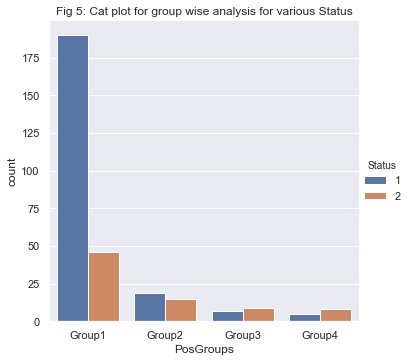

In [26]:
sns.catplot('PosGroups', hue='Status', kind='count', data=breast_cancer, legend=True);
plt.title('Fig 5: Cat plot for group wise analysis for various Status')

<a id=section604></a>
## 6.4 Lets check the relation between Years_of_operation and Status

In [27]:
breast_cancer.Years_of_operation.value_counts()

58    34
64    31
63    29
66    28
65    28
60    28
59    27
67    24
61    24
62    22
68    13
69    11
Name: Years_of_operation, dtype: int64

- **Since the base year is 1900, converting the date to a more readable format**

In [28]:
breast_cancer['Years_of_operation'] = breast_cancer['Years_of_operation'].apply(lambda x: 1900+x)

In [29]:
breast_cancer['Years_of_operation'].sample(2)

184    1958
49     1964
Name: Years_of_operation, dtype: int64

In [30]:
labels = list(breast_cancer.Years_of_operation.unique())
labels.sort()

Fig 6: Pie chart showing the proportions of Operations for the given time period


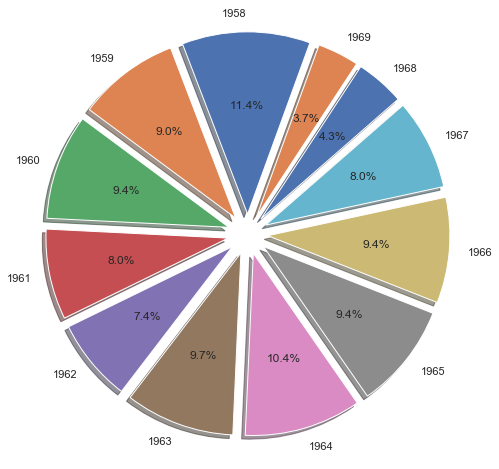

In [31]:
 # fig1, ax1 = plt.subplots()
print("Fig 6: Pie chart showing the proportions of Operations for the given time period")

plt.figure(figsize=(7,7))
plt.pie(breast_cancer.Years_of_operation.value_counts(sort=False), explode = [0.11 for i in range(0,12)],  
        shadow=True, labels = labels, autopct='%0.1f%%',  startangle=70)

# ax1.axis('equal')
# plt.legend(breast_cancer.Years_of_operation.unique().sort())
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Fig 7: Histogram showing the total number of Operations which took place in a year')

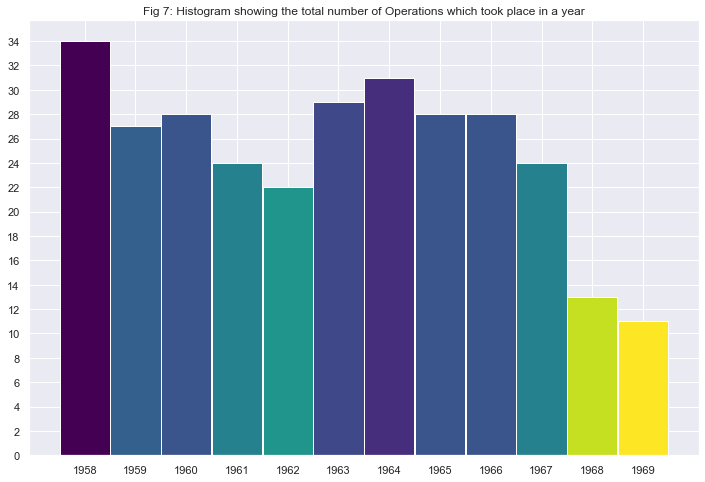

In [32]:
plt.figure(figsize=(12,8))

#N is the count value of each bin, bins is the lower limit of of the bin
N, bins, patches = plt.hist('Years_of_operation', bins= (np.arange(1958,1971)-0.5), data=breast_cancer, rwidth=0.99)

#List of values
frac = N/N.max()

# Normalising the data to cover it properly with colormap
norm = colors.Normalize(frac.min(), frac.max())

#We'll loop through the objects(patches) and set colors
for fra, pat in zip(frac, patches):
    color = plt.cm.viridis_r(norm(fra))
    pat.set_facecolor(color)
    
plt.xticks(range(1958,1970))
plt.yticks(range(0,int(N.max()+1),2))
plt.title('Fig 7: Histogram showing the total number of Operations which took place in a year')

**Analysing Fig 7: This dataset contains information for the period - 1958 to 1969:**
 - Majority of operations took place in **1958 : 36 operations (~11.8%)**
 - Second highest operations were done in the year **1964 : 31 operations (~10.1%)**
 - The least number of operations took place in the year **1969 : 11 operations (~3.6%)**

Text(0.5, 1, 'Fig 8: Cat plot for year wise analysis for various Status')

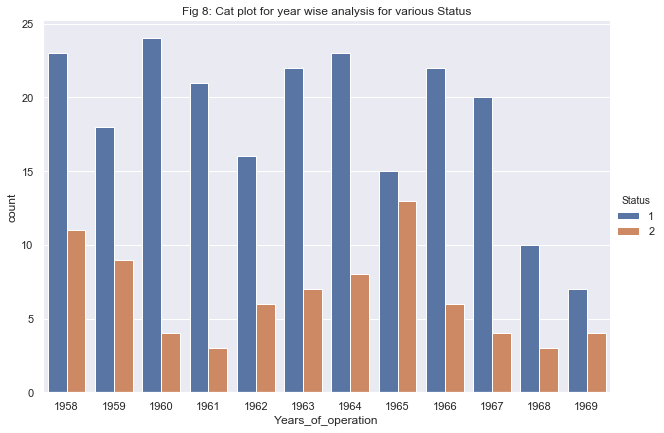

In [33]:
# plt.figure(figsize=(20,10))
# sns.set(rc={"figure.figsize" : (30,10)})
sns.catplot('Years_of_operation', hue='Status', kind='count', data=breast_cancer, legend=True, height=6, aspect=11.7/8.27);
plt.title('Fig 8: Cat plot for year wise analysis for various Status')

**Analysing Fig 8: For the period of 1958 - 1969 :**
   - All throughout the span, more patients survived for more than 5 years after their operations.
   - The year **1965** saw a sudden decrease in the ratio between **Status=1 : Status=2** i.e. there was a very small difference between the two groups of surviving patients.
   - The years **1960** and **1961** have more or less of an **ideal ratio** between the two statuses.

<a id=section605></a>
## 6.5 Lets check the relation between Age, Pos_axillary_nodes and Status

Fig 9: Relation between AgeGroup, Pos_axillary_nodes and Status


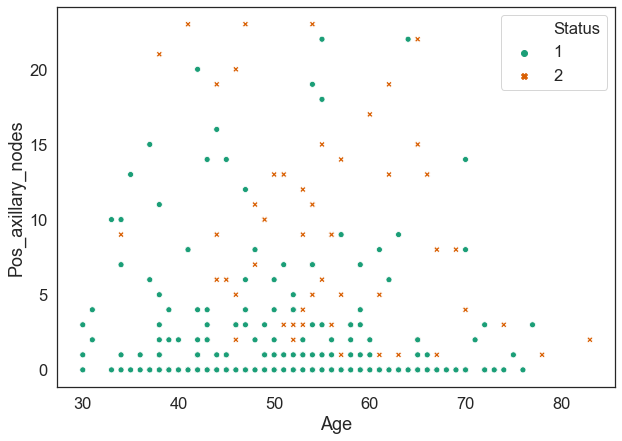

In [34]:
print("Fig 9: Relation between AgeGroup, Pos_axillary_nodes and Status")
sns.set(rc={"figure.figsize" : (10,7)}, style='white', font_scale=1.5)
sns.scatterplot(data = breast_cancer, y='Pos_axillary_nodes', x='Age', hue="Status", style ="Status", legend="full", palette="Dark2")

- We can observe a pattern, throughout **all ages**, for very low values of **Pos_axillary_nodes, strictly between 0-10,** majority of the points have a **Status=1**, i.e. majority of the patients survived 5 years or longer.
- As the value of **Pos_axillary_nodes** starts increasing throughout **all ages**, the datapoints for both **Statuses** appear mixed.

<a id=section606></a>
## 6.6 Let us check the correlation between all the variables using a heatmap

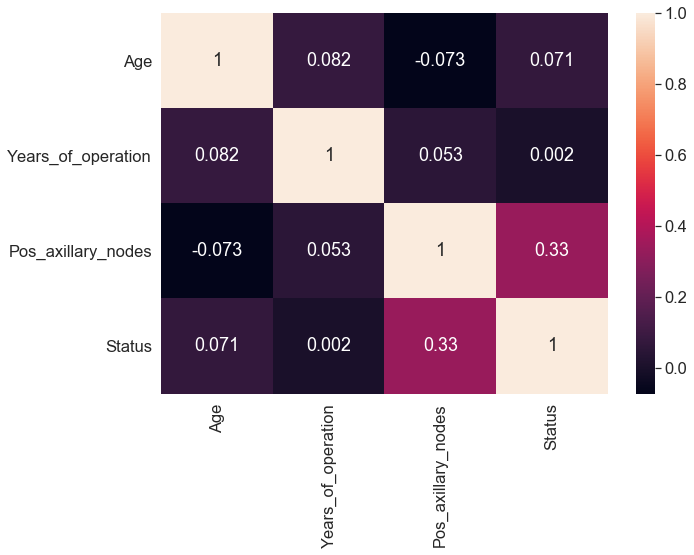

In [36]:
sns.heatmap(breast_cancer.corr(), annot=True)

**None of the values seem to be highly correlated with one another, hence, we will not face redundancy issues.**

<a id=section7></a>
## 7. End Result

1. There were outliers in Pos_axillary_nodes field, which constituted **13.07%** of the total values. Around **2.29%** values were removed to correct the skewness a bit and prevent excess loss of information. <br><br>

2. In the dataset at hand, **73.5%** patients survived for more than 5 years.<br><br>

3. Majority of the patients belong to **Ages between 44-57 (~44.5%)**, out of which **30.43%** lived for more than 5 years after their operation.
In general, throughout all ages, We had more patients surviving for more than 5 years after operation.<br><br>

4. Majority of the patients with less number of axillary nodes (0-5), survived for more than 5 years after the operation.

<a id=section701></a>
## 7.1 Hypothesis

The **Hypothesis** we derived from performing **Diagnostic Analysis** on the **breast cancer survival** dataset is as follows: 

      a. Patients throughout all ages, for lesser number of positive axillary nodes (between 0-5) present, or 
      b. Patients in the younger age group (between 30-45), throughout all values of positive axillary nodes,
        
         have higher chances of surviving beyond 5 years post operation.